In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:16px;}
</style>
"""))

<b><font color="red" size="6">ch11. N차원 배열 다루기</font></b>
- [numpy](https://numpy.org/)
- [numpy docs](https://numpy.org/doc/stable/)
- N차원 배열 객체
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1절. 넘파이 패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
a = np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [4]:
from numpy import arange
a = arange(15).reshape(3,5) # 3행5열짜리 2차원 배열
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
type(a) # a배열 변수의 타입

numpy.ndarray

In [6]:
a.dtype # a배열변수의 요소들의 type

dtype('int32')

In [7]:
a.dtype.name

'int32'

In [8]:
a.itemsize # 한 요소의 bytesize (int32의 경우 : 4byte)

4

In [9]:
a.ndim # 축수(차원수)

2

In [10]:
a.size # 배열 요소의 갯수

15

In [11]:
a.shape # 배열의 구조(3행5열)

(3, 5)

In [12]:
print('shape 조정 전 a:\n', a)
a.shape = (5,3)
print('shape 수정 후 a :\n', a)

shape 조정 전 a:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 수정 후 a :
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [14]:
# 배열 요소의 타입을 수정
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
a.size # 요소의 갯수

12

In [18]:
a.dtype

dtype('int32')

In [19]:
a.itemsize

4

In [20]:
a.dtype = np.int64
a.dtype

dtype('int64')

In [22]:
a.itemsize # 요소의 byte 사이즈

8

In [23]:
a.size

6

In [24]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [25]:
a.ravel() # flatten 됨()

array([ 4294967296, 12884901890, 21474836484, 30064771078, 38654705672,
       47244640266], dtype=int64)

# 2절. 넘파이 배열
- array()함수를 이용한 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타 함수들 : arange, ones, zeros, empty
- 랜덤값을 갖는 함수들 ....
- [넘파이 doc](https://numpy.org/doc/stable/)
- [넘파이 함수들](https://numpy.org/doc/stable/reference/index.html#reference)

## 2.1 array()함수로 넘파이 배열 만들기
- array(obj, dtype=np.xx, copy=T/F)

In [30]:
a = np.array([2, 4, 6], dtype=np.int16) # 정수의 기본타입 int32
a

array([2, 4, 6], dtype=int16)

In [32]:
a[0], a[1], a[2]

(2, 4, 6)

In [33]:
for i in a:
    print(i, end='\t')

2	4	6	

In [34]:
a.dtype

dtype('int16')

In [40]:
b = np.array([[1.5, 2.3],  # 실수의 기본 타입은 float64
              [4,5]])      # 동일 자료형으로 배열 생성 : 정수>실수>문자
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [37]:
b[0][0], b[0,0] # 2차원 [axis0행, axis1열]

(1.5, 1.5)

In [42]:
b = np.array([(1.5, 2.3),  # 실수의 기본 타입은 float64
              (4,5)])      # 동일 자료형으로 배열 생성 : 정수->실수->문자
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [43]:
a = np.array([[1.5, 2.3], [4,5]]).reshape(1,4) # 2행2열짜리 배열을 1행 4열로 shape 변환
a

array([[1.5, 2.3, 4. , 5. ]])

In [44]:
a.dtype

dtype('float64')

In [46]:
a = np.array([1.5, 2.3, 4,5], dtype=np.float32).reshape(2,2)
a

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [47]:
a.itemsize # 한 요소의 byte 수

4

In [49]:
a.dtype

dtype('float32')

In [52]:
# a.dtype = np.float64 안 됨
a = a.astype(np.float64) # 배열 요소의 타입을 바꾸는 함수
a

array([[1.5       , 2.29999995],
       [4.        , 5.        ]])

In [54]:
a.dtype

dtype('float64')

In [55]:
l = [[1, 2], [3.4, 4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [56]:
for i, row in enumerate(l):
    for j, data in enumerate(row):
        print("{}행{}열 : {}".format(i, j, data), end='\t')
    print()

0행0열 : 1	0행1열 : 2	
1행0열 : 3.4	1행1열 : 4.5	


In [65]:
print(l[0][0]) # 리스트의 인덱싱
print(l[0:2][0]) # 슬라이싱

1
[1, 2]


In [2]:
# 2차원 배열
import numpy as np
b = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [3]:
for row in b:
    for data in row:
        print(data, end='\t')
    print()

1	2	3	4	5	
6	7	8	9	10	


In [4]:
for i, row in enumerate(b):
    for j, data in enumerate(row):
        print("{}행{}열:{}".format(i, j, data), end='\t')
    print()

0행0열:1	0행1열:2	0행2열:3	0행3열:4	0행4열:5	
1행0열:6	1행1열:7	1행2열:8	1행3열:9	1행4열:10	


In [66]:
print(b[0,0]) # 인덱싱
print(b[0:10, 1:3]) # 슬라이싱(행과 열을 모두 슬라싱하면 2차원 배열)

1
[[2 3]
 [7 8]]


In [67]:
print(b[0, 1:3]) # 0행을 슬라이싱하면 1차원 배열

[2 3]


In [70]:
print(b[:,-1]) # 모든 행의 마지막 열만 추출

[ 5 10]


In [71]:
print(b[:, -2:]) # 모든 행의 마지막 2열을 추출

[[ 4  5]
 [ 9 10]]


In [6]:
# 스칼라변수
a = 10
b = a
print('a={}, b={}'.format(a, b))
b = -1
print('a={}, b={}'.format(a, b))

a=10, b=10
a=10, b=-1


In [9]:
# numpy 배열
c = np.array([ [1,2,], [3,4] ])
d = np.array(c, copy=False) # d = c 동일 ; 얕은 복사

print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('두변수의 주소 :', id(c), id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c.dtype=', c.dtype, ',d.dtype=', d.dtype)

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
두변수의 주소 : 2767130441072 2767130441072
c=
[[9 2]
 [3 4]]
d=
[[9 2]
 [3 4]]
c.dtype= int32 ,d.dtype= int32


In [10]:
# numpy 배열
c = np.array([ [1,2,], [3,4] ])
d = np.array(c, copy=True) # d = c.copy() 동일 ; 깊은 복사

print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('두변수의 주소 :', id(c), id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c.dtype=', c.dtype, ',d.dtype=', d.dtype)

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
두변수의 주소 : 2767130437712 2767130441936
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]
c.dtype= int32 ,d.dtype= int32


In [13]:
# copy=False 넣었지만 깊은 복사가 되는 경우
c = np.array([[1,2],[3,4]], dtype=np.int32) # 기본타입이 int32
d = np.array(c, copy=False, dtype=np.int16) # dtype이 바뀌면 자동 깊은 복사
d[0,0] = 9
print('두변수의 주소 :', id(c), id(d))
print('두변수의 dtype ;', c.dtype, d.dtype)
print('c = ', c, sep='\n')
print('d = ', d, sep='\n')

두변수의 주소 : 2767142038928 2767142033072
두변수의 dtype ; int32 int16
c = 
[[1 2]
 [3 4]]
d = 
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수인 기본값
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 달라짐)

※ 위 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype 속성을 따로 지정할 수 있음

In [14]:
np.zeros( (3,5) ) # 3행5열짜리 2차원 float64 배열(요소들은 다 0)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [16]:
x = np.zeros((2,5), dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize) # 한 요소의 byte 사이즈

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [17]:
np.ones( (2,5) )

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [18]:
np.ones( (2,5) , dtype=np.complex64)

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]], dtype=complex64)

In [25]:
np.full( (2,5), -1.2)

array([[-1.2, -1.2, -1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2, -1.2, -1.2]])

In [28]:
np.empty( (3,2) ) # 초기값이 메모리 상태에 따라 임의의 값

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup) : low부터 high미만까지 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균loc과 표준편차scale을 갖는 정규분포를 갖는 랜덤값

- np.random.rand(n) : 균등분포의 1차원 난수 배열발생 (난수 n개)
- np.random.randn(n) : 표준정규분포의 1차원 난수 배열 발생 (난수 n개)

- np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

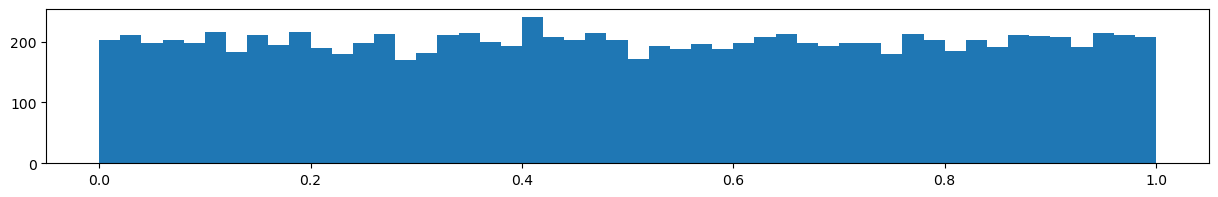

In [11]:
# rand()가 균등분포(최소값~최대값까지 균일한 확률로 난수 발생)에서 난수 발생 확인
import matplotlib.pyplot as plt
import numpy as np
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

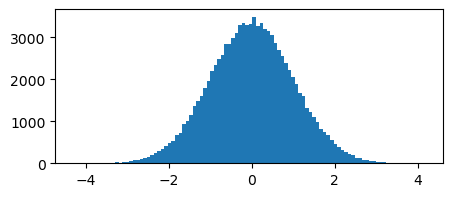

In [46]:
# randn() : 표준정규분포(평균0, 표준편차1인 정규분포)에서 난수 발생
x = np.random.randn(100000)
plt.figure(figsize=(5,2)) # 그래프 사이즈 조정
plt.hist(x, bins=100)
plt.show()

In [60]:
# 2차원 난수 배열
np.random.random( (2,5) ) # 2행5열짜리 난수(0이상1미만의 균등분포 실수난수) 배열

array([[0.36572973, 0.10776593, 0.03026791, 0.85164791, 0.93226587],
       [0.50165006, 0.54491314, 0.90933309, 0.39889711, 0.35176089]])

In [63]:
np.random.uniform(-2, 10, (2,5)) # 2행5열짜리 난수(-2~10미만의 균등분포 실수 난수) 배열

array([[ 2.41457784,  7.08634778,  0.8976385 ,  9.90716855,  4.66571536],
       [ 3.01581351,  5.55616477,  8.62865985, -1.796994  , -0.05345729]])

In [64]:
np.random.seed(12) # seed값을 맞추면 발생되는 난수가 동일
np.random.normal(-2, 2, (2,4)) # 2행4열짜리 평균-2, 표준편차2인 정규분포 난수 발생

array([[-1.05402834, -3.36285176, -1.51512101, -5.40147127],
       [-0.49371433, -5.06944268, -1.98974584, -2.24045534]])

In [87]:
# 정수 난수 1개 발생
np.random.randint(45) # 0 ~ 44사이의 정수 난수 1개 발생(균등분포)

37

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너뛴 값(to미포함)을 1차원 배열로 생성
- np.linspace(from, to, num) : from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성

In [88]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [91]:
np.arange(0, 2.1, 0.3).reshape(4,2)

array([[0. , 0.3],
       [0.6, 0.9],
       [1.2, 1.5],
       [1.8, 2.1]])

In [92]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [94]:
np.linspace(0, 2, 20).reshape(4,5)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263],
       [0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421],
       [1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [100]:
# linspace : 많은 수의 점들을 생성할 때 유용
from numpy import linspace, pi
x = linspace(0, 2*pi, 1000)
f = np.sin(x)

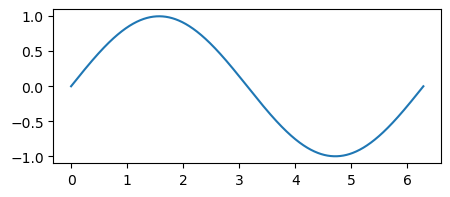

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.plot(x, f)
plt.show()

## 2.5 배열의 차원 변경하기
- reshape(행수, 열수) : -1이 올 수
- resize( (행수, 열수) ) : -1이 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [103]:
t = np.random.random( (2,3) )
t

array([[0.60825806, 0.78942648, 0.92674104],
       [0.26857578, 0.3042344 , 0.73756322]])

In [110]:
a = np.floor(t*10)
a

array([[6., 7., 9.],
       [2., 3., 7.]])

In [115]:
a = a.astype(np.int16) # astype() : 요소들의 타입 변환 함수
a # 2행 3열 2차원 배열

array([[6, 7, 9],
       [2, 3, 7]], dtype=int16)

In [118]:
a = a.reshape(3,2) # 3행2열로 차원변경
a

array([[6, 7],
       [9, 2],
       [3, 7]], dtype=int16)

In [121]:
a.reshape(-1, 3) # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[6, 7, 9],
       [2, 3, 7]], dtype=int16)

In [122]:
a.reshape(6, -1)

array([[6],
       [7],
       [9],
       [2],
       [3],
       [7]], dtype=int16)

In [124]:
a.resize( (2,3) )
a

array([[6, 7, 9],
       [2, 3, 7]], dtype=int16)

In [125]:
a.resize(-1, 6) # resize는 -1 사용 불가

ValueError: negative dimensions not allowed

In [126]:
a

array([[6, 7, 9],
       [2, 3, 7]], dtype=int16)

In [127]:
a.T # a의 전치행렬 (행과 열을 뒤바꾼 행렬)

array([[6, 2],
       [7, 3],
       [9, 7]], dtype=int16)

In [128]:
a.transpose() # a의 전치행렬

array([[6, 2],
       [7, 3],
       [9, 7]], dtype=int16)

## 2.6 배열 인쇄

In [131]:
# 배열이 커서 출력이 안 될 경우
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


In [133]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [137]:
# 배열이 너무 커서 인쇄할 수 없는 경우는 자동으로 건너뛰고 모서리 부분만 출력
# 넘파이의 인쇄 옵션 변경 (인쇄할 사이즈를 최대치)
import sys
np.set_printoptions(threshold=10000) # 배열 10000개까지 출력하도록 옵션
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=np.inf) # np.inf:무한대
# 커널 재시작시 다시 옵션 복귀

In [138]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [2]:
import numpy as np
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

## 2.7 기본 연산 동작
### 1) 배열의 요소별 연산

In [5]:
a = np.array([20,30,40,50])
b = np.arange(4)
print(a)
print(b)

[20 30 40 50]
[0 1 2 3]


In [6]:
a + b # 요소별 + 연산

array([20, 31, 42, 53])

In [7]:
a ** b

array([     1,     30,   1600, 125000])

In [8]:
a += b # a = a+b
a

array([20, 31, 42, 53])

In [10]:
a < 40

array([ True,  True, False, False])

In [12]:
# a배열에서 40보다 작은 데이터만 추출하려면 인덱스에서 식을 사용
a[a<40]

array([20, 31])

In [13]:
a * b # 요소별 곱

array([  0,  31,  84, 159])

### 2)행렬의 곱(@, dot함수) cf. *(요소별 곱)

In [14]:
A = np.array([ [1, 1],
               [0, 1]])
B = np.array([ [2, 0],
               [3, 4]])
A, B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [17]:
print('요소별 곱 A*B =', A*B , sep='\n')
print('행렬곱 A@B =', A@B, sep='\n')
print('행렬곱 A.dot(B) =', A.dot(B), sep='\n')

요소별 곱 A*B =
[[2 0]
 [0 4]]
행렬곱 A@B =
[[5 4]
 [3 4]]
행렬곱 A.dot(B) =
[[5 4]
 [3 4]]


In [19]:
A = np.array([ [1, 0],
               [0, 1]])
B = np.array([ [2, 0],
               [3, 4]])

In [20]:
print('B@단위행렬 = ', B@A, sep='\n')

B@단위행렬 = 
[[2 0]
 [3 4]]


In [21]:
print('단위행렬@B = ', A@B, sep='\n')

단위행렬@B = 
[[2 0]
 [3 4]]


### 3)복합 대입 연산자 사용 (-=, +=, ...)

In [33]:
a = np.ones( (2, 3), dtype=int ) # 2행3열짜리 int32 배열
a

array([[1, 1, 1],
       [1, 1, 1]])

In [30]:
b = np.random.random( (2,3) ) # 2행3열짜리 float64 배열
b

array([[0.27913998, 0.9746032 , 0.617287  ],
       [0.60797444, 0.79740557, 0.2015144 ]])

In [31]:
a += 3 # a = a+3
a

array([[4, 4, 4],
       [4, 4, 4]], dtype=int64)

In [27]:
b += a # b = b+a
b

array([[4.94007015, 4.69271524, 4.67841896],
       [4.73859955, 4.04009243, 4.78224259]])

In [32]:
a += b # a = a+b

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

### 4) 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)

In [36]:
a = np.array([[2,2,2,3], 
              [4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [41]:
print('전체 합 :', a.sum(), np.sum(a))
print('전체 평균 :', a.mean(), np.mean(a))
print('전체 최소값 :', a.min(), np.min(a))
print('전체 최대값 :', a.max(), np.max(a))
print('전체 분산 :', a.var(), np.var(a))
print('전체 표준편차 :', a.std(), np.std(a))

전체 합 : 19 19
전체 평균 : 2.375 2.375
전체 최소값 : 1 1
전체 최대값 : 4 4
전체 분산 : 0.734375 0.734375
전체 표준편차 : 0.8569568250501305 0.8569568250501305


### 5) 배열 축별 집계
- 축별 sum, min, max, mean, var(분산), std(표준편차), argmax

In [43]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [46]:
# axis=1(1축)들의 합
print('a 행별 합 :', a.sum(axis=1), np.sum(a, axis=1))

a 행별 합 : [ 9 10] [ 9 10]


In [47]:
# 열을 고정하고, 0축의 합
print('a 열별 합 :', a.sum(axis=0), np.sum(a, axis=0)) 

a 열별 합 : [6 5 4 4] [6 5 4 4]


In [49]:
print('a 행별 최대값 :', a.max(axis=1), np.max(a, axis=1))
print('a 열별 최대값 :', a.max(axis=0), np.max(a, axis=0))

a 행별 최대값 : [3 4] [3 4]
a 열별 최대값 : [4 3 2 3] [4 3 2 3]


In [50]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [54]:
print('a 행별 최대값 위치 :', a.argmax(axis=1))

a 행별 최대값 위치 : [3 0]


In [23]:
# 3차원 배열의 집계
import numpy as np
b = np.arange(24).reshape(2, 3, 4) # 2면 3행 4열
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [24]:
b.sum(), np.sum(b), b.min(), b.max(), b.mean(), b.std(), b.var() # 배열 전체에 대한 집계값

(276, 276, 0, 23, 11.5, 6.922186552431729, 47.916666666666664)

In [25]:
# 분산에 루트 씌우면 표준편차
import math
math.sqrt(b.var()) # math.sqrt(): 스칼라 값에 루트 씌운 값

6.922186552431729

In [30]:
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [31]:
np.sum(b, axis=0) # 행과 열은 고정으로하고 0축들을 합 0,0,0+1,0,0

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [32]:
np.sum(b, axis=1) # 면과 열은 고정으로 하고 1축들을 합 0,0,0 + 0,1,0+0,2,0+0,3,0

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [33]:
np.sum(b, axis=2) #면, 행은 고정으로 하고, 2축들을 합

array([[ 6, 22, 38],
       [54, 70, 86]])

## 2.8 그 외 요소별 계산하는 범용함수들

- 출력인수를 사용하면 메모리를 더 효율적으로 사용할 수 있음

    - np.sqrt(배열) : 제곱근 / math.sqrt(스칼라변수)
    - np.add(A, B, C) : C=np.add(A,B)와 동일
    - np.multiply(A, B, C) : C = A*B와 동일
    - np.subtract(A, B, C) 
    ......

In [37]:
a = np.array([1,2])
b = np.array([3,4])
c = np.empty((2))
a, b, c

(array([1, 2]), array([3, 4]), array([4., 6.]))

In [35]:
np.add(a, b, c) # c = np.add(a, b) # c = a+b
c

array([4., 6.])

In [45]:
a = np.array([1, 4, 9, 16])
b = np.empty(4)
np.sqrt(a, b) # math.sqrt(a) 불가 스칼라 변수만 가능
b

array([1., 2., 3., 4.])

array([1., 2., 3., 4.])

In [46]:
# 메모리 사용량과 속도 측정해주는 메모리 프로파일러를 로드
# 아나콘다 프롬프트에서 pip install memory_profiler
%load_ext memory_profiler
A = np.random.randn(100000000) # 1억개 요소
B = np.random.randn(100000000)
C = np.random.randn(100000000)

In [ ]:
# %%time : 셀을 실행할 때 소요시간 출력
# %memit : 메모리 사용량 출력

In [47]:
%%time
%memit G = A*B + C
print(G)

peak memory: 3708.41 MiB, increment: 1301.89 MiB
[ 0.33814069 -1.15880462 -0.26079278 ... -3.0558984  -3.30196678
  0.69873668]
CPU times: total: 703 ms
Wall time: 1.56 s


In [48]:
%%time
%memit T = A*B; G=T+C; del T
print(G)

peak memory: 4669.29 MiB, increment: 1499.69 MiB
[ 0.33814069 -1.15880462 -0.26079278 ... -3.0558984  -3.30196678
  0.69873668]
CPU times: total: 625 ms
Wall time: 1.38 s


In [49]:
%%time
%memit G = A*B; G+=C
print(G)

peak memory: 3895.05 MiB, increment: 725.43 MiB
[ 0.33814069 -1.15880462 -0.26079278 ... -3.0558984  -3.30196678
  0.69873668]
CPU times: total: 453 ms
Wall time: 1.27 s


In [50]:
%%time
%memit np.multiply(A, B, G); np.add(G, C, G)
print(G)

peak memory: 3170.18 MiB, increment: 0.00 MiB
[ 0.33814069 -1.15880462 -0.26079278 ... -3.0558984  -3.30196678
  0.69873668]
CPU times: total: 344 ms
Wall time: 1.1 s


## 2.9 브로드 케스팅
- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능

In [52]:
# 1차원 배열인 경우
a = np.array([1,2,3])
b = 10
print(a+b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [53]:
# 1차원 배열인 경우
a = np.array([1,2,3])
b = np.array([10])
print(a+b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [55]:
# 2차원 배열인 경우
a = np.array([ [0,0,0], # 4행3열짜리 2차원
               [10,10,10],
               [20,20,20],
               [30,30,30],])
b = np.array([0,1,2]) # 3열짜리 1차원
np.add(a, b), np.multiply(a,b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))

In [56]:
# 2차원 배열인 경우
a = np.array([ [0,0,0], # 4행3열짜리 2차원
               [10,10,10],
               [20,20,20],
               [30,30,30],])
b = np.array([[5],[5],[5],[5]]) # 4행1열짜리 2차원
np.add(a, b), np.multiply(a,b)

(array([[ 5,  5,  5],
        [15, 15, 15],
        [25, 25, 25],
        [35, 35, 35]]),
 array([[  0,   0,   0],
        [ 50,  50,  50],
        [100, 100, 100],
        [150, 150, 150]]))

In [58]:
a = np.array([0,10,20,30])
b = np.array([1,2,3])

In [65]:
from numpy import newaxis
# np.newaxis 연산자를 이용하여 배열에 새로운 축을 추가하여 2차원
A =a[:, newaxis]
A

array([[ 0],
       [10],
       [20],
       [30]])

In [66]:
print(A + b)
print(np.add(A, b))

[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]
[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]


# 3절. 배열합치기/배열분리하기
- 슬라이싱
- 두배열을 합치는 함수
- r_, c_
- 하나의 배열을 여러개 작은 배열로 분리하는 함수
## 3.1 인덱싱과 슬라이싱
- 교안 pdf 32pt
    - [인덱싱 docs](https://docs.scipy.org/doc/numpy/user/basics.indexing.html)
    - [배열 인덱싱 docs](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)
    - [newaxis](https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.newaxis)

In [67]:
a = np.arange(10)*3
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [70]:
# 인덱싱 : 없는 인덱싱 사용시 에러
a[2], a[-1]

(6, 27)

In [69]:
a[10]

IndexError: index 10 is out of bounds for axis 0 with size 10

In [71]:
# 슬라이싱 : 없는 인덱스 값도 가능
a[1:9:2]

array([ 3,  9, 15, 21])

In [72]:
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [73]:
a[::2] = 99
a

array([99,  3, 99,  9, 99, 15, 99, 21, 99, 27])

In [74]:
a[:100]

array([99,  3, 99,  9, 99, 15, 99, 21, 99, 27])

In [75]:
b = np.arange(20).reshape(5,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [76]:
b[1,2]

6

In [77]:
b[:, 0:-1] # 모든 행의 마지막 열 앞까지(종속변수를 제외하는 용도)

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14],
       [16, 17, 18]])

In [85]:
# 0~1행까지 모든 열 추출 (열을 생략할 경우 모든 열)
b[0:2, :], b[0:2, ], b[0:2], b[0:2, ...]

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

In [86]:
# 모든행의 마지막 열만 추출(종속변수 추출하는 용도)
# 선행축은 생략 불가
b[:,-1] , b[..., -1]

(array([ 3,  7, 11, 15, 19]), array([ 3,  7, 11, 15, 19]))

In [87]:
# 모든행의 마지막 열을 추출해서 2차원으로 변경(5열 -> 5행1열)
b[:, -1][:, newaxis]

array([[ 3],
       [ 7],
       [11],
       [15],
       [19]])

In [88]:
b[..., -1].reshape(5,1)

array([[ 3],
       [ 7],
       [11],
       [15],
       [19]])

In [95]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [89]:
b[:,-1:]

array([[ 3],
       [ 7],
       [11],
       [15],
       [19]])

In [94]:
b[1:4, 1:3], b[1:-1, 1:-1]

(array([[ 5,  6],
        [ 9, 10],
        [13, 14]]),
 array([[ 5,  6],
        [ 9, 10],
        [13, 14]]))

In [96]:
# 3차원 배열의 인덱싱, 슬라이싱
c = np.arange(24).reshape(2, 3, 4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [98]:
c[1,1,1]

17

In [101]:
# 선행축은 생략불가, 후행축은 생략가능
# 0면
c[0], c[0,], c[0, ...]

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

In [105]:
#1면 0행의 모든 열
c[1, 0, :], c[1,0,], c[1, 0, ...]

(array([12, 13, 14, 15]), array([12, 13, 14, 15]), array([12, 13, 14, 15]))

In [106]:
# 1면 모든 행의 1열 데이터
c[1, :, 1], c[1, ..., 1], 

(array([13, 17, 21]), array([13, 17, 21]))

In [107]:
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [108]:
c[:, 0:2, 1:3]

array([[[ 1,  2],
        [ 5,  6]],

       [[13, 14],
        [17, 18]]])

## 3.2 두 배열을 쌓아 합치는 함수
**- vstack(tup) : 아래에 추가하는 방식으로 쌓아 합침**<br>
**- hstack(tup) : 옆으로 추가하는 방식으로 합침**<br>
**- dstack(tup) : 마지막 축(열)을 쌓아 합침. depth방향으로 합치는 함수(차원증가)**

In [111]:
c = np.array([1,2,3])
d = np.array([4,5,6])
v = np.vstack( (c,d) )
print('vstack 아래로 합치기 :', v, v.shape, sep='\n')
h = np.hstack( (c,d) )
print('hstack 옆으로 합치기 :', h, h.shape, sep='\n')
d = np.dstack( (c,d) )
print('dstack 축을 depth로 합치기 :', d, d.shape, sep='\n')

vstack 아래로 합치기 :
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 합치기 :
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기 :
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [112]:
c = np.arange(24).reshape(2, 3, 4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [114]:
a, b = c[0], c[1]
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [115]:
# 수직으로 합치기
np.vstack( (a, b) )

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [117]:
np.concatenate( (a, b), axis=0) # axis=0 : 기본값

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [118]:
np.concatenate( (a, b), axis=1) 

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [119]:
np.hstack( (a, b) ) # 옆으로 합치기

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [122]:
a, b # 마지막축(열)끼리 쌓아 면을 이룸 (2차원 배열을 dstack하면 3차원 배열로 됨)

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [123]:
np.dstack( (a, b))

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

- column_stack(tup) : 1차원 배열을 2차원 배열의 열단위로 합침
- row_stack(tup) : 행단위로 합침 == vstack()

In [124]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.column_stack( (a, b, c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [125]:
np.hstack( (a, b, c))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [129]:
np.hstack( (a[:, newaxis], b[:, newaxis], c[:, newaxis]) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [130]:
np.row_stack( (a, b, c) )

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [131]:
np.vstack( (a, b, c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

- stack(tup, axis=n) : axis 속성에 따라 배열을 합침. axis 음수차원이 가능
    - axis=0 : 첫번째 차원, axis=-1이면 마지막차원(열)

In [133]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12, 24).reshape(3, 4)
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [134]:
np.stack( (a, b), axis=0) # 0면에 a, 1면 b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [135]:
np.stack( (a, b), axis=1) # 행(1축)까리 합쳐 면을 이룸

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [136]:
np.stack( (a, b), axis=-1) # 열끼리 합쳐서 면을 이룸

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_
- 나열 객체

In [6]:
import numpy as np
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])

In [7]:
np.r_[a, b, c] # 한행

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [9]:
np.r_[[a],[b],[c]]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [10]:
np.c_[a, b, c]

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [11]:
np.column_stack( (a, b, c) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4 배열 분리하는 함수
- vsplit(ary, 정수나 벡터) : 첫번째 축(2차원의 경우 가로축)을 따라 분할
- hsplit(ary, 정수나 벡터) : 두번째 축(2차원의 경우 세로축)을 따라 분할
- dsplit(ary, 정수나 벡터) : depth를 따라 나눔. 3차원 이상에서만 동작

    * 정수 n : n개 분리
    * [n] : n번째 인덱스를 기점으로 분리
    * [n, m] : n번째, m번째 인덱스를 기점으로 분리

In [12]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
# 가로축을 따라 3개로 배열 분할. 분할 후에는 원래의 차원유지
a_vsplit = np.vsplit(a, 3) # 2개로 분리는 에러
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [18]:
a_vsplit = np.vsplit(a, [2]) # 2는 분할 기점이 될 인덱스
a_vsplit

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [19]:
a_vsplit = np.vsplit(a, [1, 2]) # 1, 2는 분할 기점이 될 인덱스
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [22]:
a_vsplit[0].ndim, a_vsplit[1].ndim, a_vsplit[2].ndim #분할 후 차원 수 유지

(2, 2, 2)

In [26]:
np.hsplit(a, 4)

[array([[0],
        [4],
        [8]]),
 array([[1],
        [5],
        [9]]),
 array([[ 2],
        [ 6],
        [10]]),
 array([[ 3],
        [ 7],
        [11]])]

In [27]:
# dsplit은 3차원이상만 가능
b = np.arange(24).reshape(2, 3, 4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [28]:
b_vsplit = np.vsplit(b, 2) # 첫번째 축을 기준으로 2개로 분할
b_vsplit

[array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]]),
 array([[[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])]

In [29]:
b_hsplit = np.hsplit(b, 3)
b_hsplit

[array([[[ 0,  1,  2,  3]],
 
        [[12, 13, 14, 15]]]),
 array([[[ 4,  5,  6,  7]],
 
        [[16, 17, 18, 19]]]),
 array([[[ 8,  9, 10, 11]],
 
        [[20, 21, 22, 23]]])]

In [30]:
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [31]:
np.dsplit(b, 2)

[array([[[ 0,  1],
         [ 4,  5],
         [ 8,  9]],
 
        [[12, 13],
         [16, 17],
         [20, 21]]]),
 array([[[ 2,  3],
         [ 6,  7],
         [10, 11]],
 
        [[14, 15],
         [18, 19],
         [22, 23]]])]

- split(ary, 갯수나 인덱스 벡터, axis=?)
    * axis=0 : vsplit() 동일
    * axis=1 : hsplit() 동일
    * axis=2 : 3차원 이상에서만 동작. dsplit() 동일
- array_split(ary, 갯수나 인덱스 벡터, axis=?)
    * split()과 차이점은 나눠지지 않는 정수로도 사용 가능

In [33]:
a = np.arange(20).reshape(2, 10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [34]:
np.split(a, 2, axis=1)

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [36]:
# np.split(a, 3, axis=1)
np.array_split(a, 3, axis=1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]